In [1]:
import librosa
import numpy as np
from IPython.display import Audio
y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)
Audio(data=y, rate=sr)

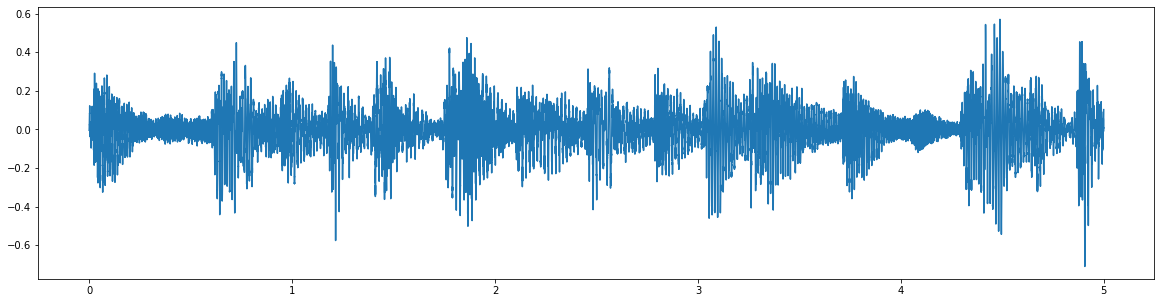

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(y))/sr, y);

In [5]:
hop = int(sr*0.010) # hop for 10 ms
frame_size = int(sr*0.025) # frame size for 25 ms
n_fft = 1024 # window
stft = librosa.stft(y, hop_length=hop, n_fft=n_fft, win_length=frame_size)
print(f'fft window = {frame_size/sr*1000:.2f}ms -- hop = {hop/sr*1000:.2f}ms')
print(stft.shape)

fft window = 24.99ms -- hop = 9.98ms
(513, 502)


In [14]:
# n_FFT=1024 ==> 512+1 = 513 tan so
# n_frame = len(y) / hop
len(y) / hop

501.1363636363636

In [10]:
D = np.abs(stft)
D.shape

(513, 502)

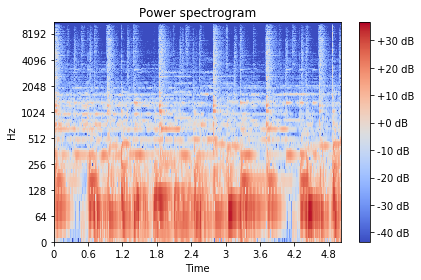

In [11]:
import matplotlib.pyplot as plt
from librosa import display
from IPython.display import Audio
display.specshow(librosa.amplitude_to_db(D), y_axis='log', x_axis='time', sr=sr, hop_length=hop)
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
Audio(data=y, rate=sr)
# hz   k:0 --> 512    k*sr/n_fft   k*22050 / 1024

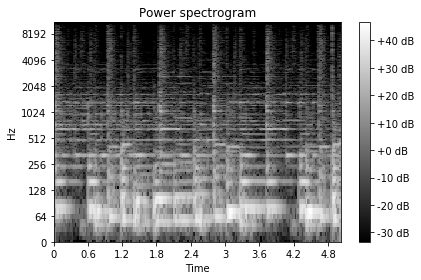

In [3]:
import matplotlib.pyplot as plt
from librosa import display
display.specshow(librosa.amplitude_to_db(D), y_axis='log', x_axis='time', cmap='gray', sr=sr, hop_length=hop)
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
Audio(data=y, rate=sr)

In [15]:
y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)
D = librosa.stft(y)
y_hat = librosa.istft(D)
Audio(data=y_hat, rate=sr)

In [10]:
n = len(y)
n_fft = 2048
y_pad = librosa.util.fix_length(y, n + n_fft // 2)
D = librosa.stft(y_pad, n_fft=n_fft)
y_out = librosa.istft(D, length=n)
Audio(data=y_out, rate=sr)

In [25]:
import librosa
y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=200,hop_length=220,win_length=550)
print(mfcc.shape)
Audio(data=y, rate=sr)

(128, 502)


In [26]:
from IPython.display import Audio
y_mfcc = librosa.feature.inverse.mfcc_to_audio(mfcc,hop_length=220,win_length=550)
Audio(data=y_mfcc, rate=sr)

In [5]:
librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True)

array([[-1.6276381e+02, -8.9025200e+01, -1.4089229e+02, ...,
        -1.0782481e+02, -2.5037590e+02, -2.3931360e+02],
       [ 1.2749146e+02,  9.5317184e+01,  1.0190823e+02, ...,
         1.1523336e+02,  2.2238391e+02,  1.7497104e+02],
       [ 1.1388008e+01,  6.1552358e+00,  1.2661100e+01, ...,
         4.5570557e+01,  4.5848167e+01,  3.9854446e+01],
       ...,
       [ 3.4622138e+00,  4.0315661e+00, -5.6938827e-01, ...,
        -6.6768336e+00, -1.1825210e-01,  1.4854668e+00],
       [ 9.5686185e-01,  1.0692396e+00, -6.8650694e+00, ...,
        -9.5978546e+00, -1.6105201e+00, -6.7159076e+00],
       [ 8.4571533e+00,  3.5823300e+00, -1.1561230e-01, ...,
        -3.0180655e+00, -1.4558303e+01, -6.9907746e+00]], dtype=float32)

In [6]:
mfcc = librosa.feature.mfcc(y=y, sr=sr)
mfcc.shape

(20, 216)

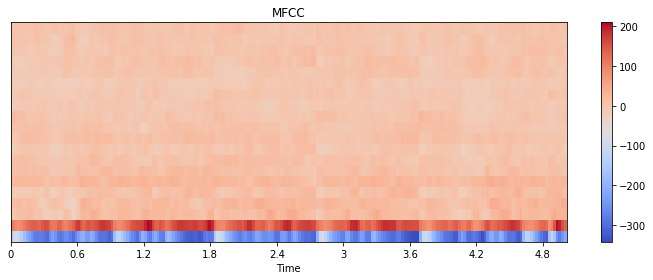

In [7]:
import matplotlib.pyplot as plt
from librosa import display
plt.figure(figsize=(10, 4))
display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()